Quickstart Guide
================

This guides demonstrates the basic usage of DPsim as a Python module. Please note that DPsim also provides a C++ API.

The first simulation
--------------------

As a first simple, test we will simulate a small static network. The network consists of 4 nodes and 4 elements:

| Component | Type            | Python Class                              | Node A | Node B | Paramter |
| :---------| :----           | :---------------------------------------- | :----- | :----- | :------- |
| v_s       | Voltage Source  | `dpsimpy.dp.ph1.VoltageSource`       | 0      | GND    | 10 kV    |
| r_line    | Line Resistance | `dpsimpy.dp.ph1.Resistor`            | 0      | 1      | 1 Ohm    |
| l_line    | Line Inductance | `dpsimpy.dp.ph1.Inductor`            | 1      | 2      | 1 Henry  |
| r_load    | Load            | `dpsimpy.dp.ph1.Resistor`            | 2      | GND    | 1 kOhm   |

Before we can start, we must import the DPsim Python module.
We also add `dp` as an alias for the dynamic phasor components.

In [5]:
import dpsimpy

Next, we can define the model by creating a couple of components.
Each component is identified by a name which is passed as the first argument.
Following arguments are used to define the topology by assigning the component to a specific node / bus or to pass parameters.

In [6]:
# Nodes
gnd = dpsimpy.dp.SimNode.gnd
n0  = dpsimpy.dp.SimNode("n0")
n1  = dpsimpy.dp.SimNode("n1")
n2  = dpsimpy.dp.SimNode("n2")

v_s = dpsimpy.dp.ph1.VoltageSource("v_s")
v_s.V_ref = 10000+0j
r_line = dpsimpy.dp.ph1.Resistor("r_line")
r_line.R = 1
l_line = dpsimpy.dp.ph1.Inductor("l_line")
l_line.L = 1
r_load = dpsimpy.dp.ph1.Resistor("r_load")
r_load.R = 1000

# Connections 
v_s.connect([n0, gnd])
r_line.connect([n0, n1])
l_line.connect([n1, n2])
r_load.connect([n2, gnd])

Next, we have to create a simulation object:

In [7]:
sys = dpsimpy.SystemTopology(50, [ n0, n1, n2 ], [ v_s, r_line, l_line, r_load ])

We can also visualize the system topology:

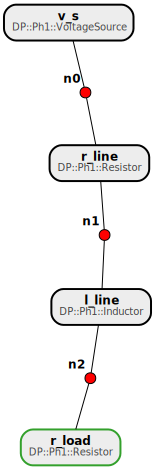

In [8]:
sys

Finally, we can start the simulation and wait for its completion:

In [ ]:
sim = dpsimpy.Simulation("Example1", loglevel=dpsimpy.LogLevel.debug)
sim.set_system(sys)
sim.set_time_step(1e-4)
sim.set_final_time(0.03)

log = dpsimpy.Logger("Example1")
for i in range(0, len(sys.nodes)):
    log.log_attribute("v" + str(i), "v", sys.nodes[i])

sim.add_logger(log)
    
sim.run()

Results can be analyzed and plotted by the `villas.dataprocessing` package:

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'font.size': 10, 'figure.figsize': (6.0, 4.0), 'figure.facecolor': 'white', 'savefig.dpi': 72, 'figure.subplot.bottom': 0.125, 'figure.edgecolor': 'white'}

import matplotlib.pyplot as plt
import villas.dataprocessing.plottools as pt
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.timeseries as ts

results     = rt.read_timeseries_dpsim('logs/Example1.csv')
results_emt = [ results[series].frequency_shift(freq=50) for series in results ]

for series in results_emt:
    pt.plot_timeseries('Results EMT', series)

plt.show()

In [ ]:
!cat logs/Example1_Solver.log